In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

df = pd.read_csv("../data/data.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
model.fit(X_train, y_train)

with open('stochastic-gradient-descent.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})")

feature_weights = model.coef_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights[0],
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)
print("Top 20 features:")
print(feature_weights_mapping)


Accuracy: 88.05% (0.8804580461877836)
Top 20 features:
                feature     weight
109  global_alarm_count  23.007764
110     events_last_24h  22.778290
8       hour_conditions   5.614046
5        hour_windspeed   3.397831
0                  city   3.335796
2         hour_datetime   2.689128
3             hour_temp   2.458356
1          day_datetime   0.654387
4           hour_precip   0.505448
21              mykolay   0.492350
7       hour_cloudcover   0.397387
10              chernih   0.380059
27                 btgs   0.359951
52                  syr   0.269117
108           dvornikov   0.256022
38           transnistr   0.255902
6          hour_winddir   0.248965
51                 odes   0.235564
36             redeploy   0.167978
35         northeastern   0.164222


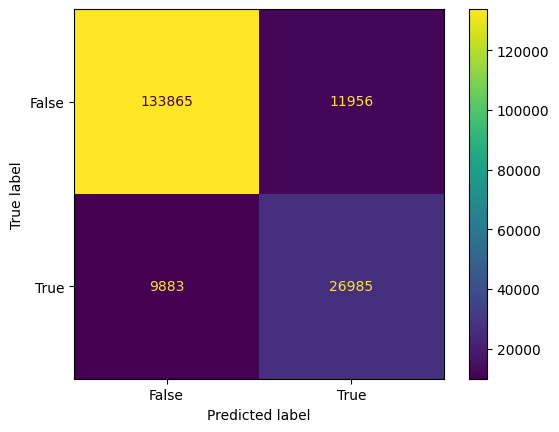

In [2]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()